In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import scipy

In [2]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!pip install gpustat
!gpustat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.8 MB/s eta 0:00:00
  Created wheel for gpustat: filename=gpustat-1.1.1-py3-none-any.whl size=26532 sha256=2a0460de193145e037db8aeedd12a05098aa80864f54a8ad4f9dd867cda8cff9
  Stored in directory: /root/.cache/pip/wheels/ec/d7/80/a71ba3540900e1f276bcae685efd8e590c810d2108b95f1e47
Successfully built gpustat
548d37abe115  Mon Apr 29 11:21:21 2024  535.104.05
[0] Tesla T4 | 49°C,   0 % |     0 / 15360 MB |


In [5]:
from platform import python_version
import torch
print("Python version", python_version())
print("Pytorch - version", torch.__version__)
print("Pytorch - cuDNN version :", torch.backends.cudnn.version())

Python version 3.10.12
Pytorch - version 2.2.1+cu121
Pytorch - cuDNN version : 8906


In [6]:
!git clone https://github.com/hzi-bifo/seminar-dlmb-2024.git

Cloning into 'seminar-dlmb-2024'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 18), reused 16 (delta 1), pack-reused 0
Receiving objects: 100% (52/52), 884.95 KiB | 6.15 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [7]:
import os
os.chdir('/content/seminar-dlmb-2024')

In [8]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00


In [9]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility

# Loading the small toxin prediction dataset

# train data
seq_train=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/train_seq.txt')
y_train=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/train_label.txt')
# test data
seq_test=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/test_seq.txt')
y_test=FileUtility.load_list('/content/seminar-dlmb-2024/dataset/test_label.txt')


print('Num of samples in train data: {}'.format(len(seq_train)))
print('Num of samples in test data: {}'.format(len(seq_test)))




Num of samples in train data: 124
Num of samples in test data: 31


In [10]:
print('Input of the first element:\n{}'.format(seq_train[0]))
print('First label: {} -> non-toxic'.format(y_train[0]))

Input of the first element:
mqtmifslayiillatvsaipsgrvdivfpsletsrsgvkiikfealgqdielnlepageilakdfaivdlnnqrehltnvedlkrkiyrdsvkgaallidengpltmqgiinsklrivpyesgrvikdgriahqivelindeksyindvmpldvngvmenvvkiskkspciiidylcvtettfterfktnkelleyitvmftgvqnlldtlnlgikaqvigitpfkkqnepsfiedsaipghqqvldpvdlvknmakyycnnakglakdadiimlisnrklgelqddgtvayntagislgsgvckqcskvgvaqddsdynervdtvahetahligaphdeegpeqtgisgspgakdcpesdgyimgsgnnkvnkfkfskctkkcvehllslprascvladc
First label: 0 -> non-toxic


Median and mean sequence length: 87.5, 180.82258064516128


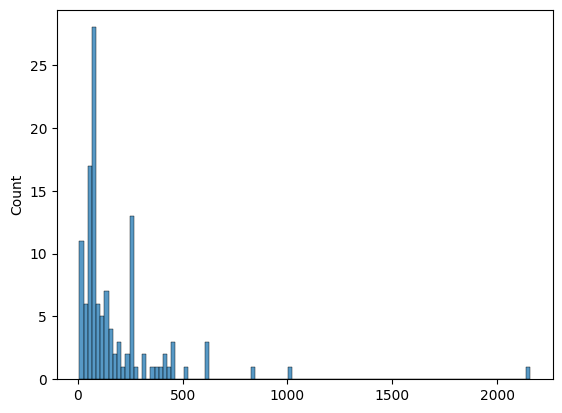

In [11]:
import seaborn as sns
import numpy as np

len_train = [len(s) for s in seq_train]
sns.histplot(len_train, binwidth=20)
median = np.median(len_train)
mean = np.mean(len_train)
print('Median and mean sequence length: {}, {}'.format(median, mean))

In [12]:
uniq_vals = set(y_train)
y_train_int = list(map(int, y_train))
print('Labels in training data')
print('Non toxic: {}'.format(y_train_int.count(0)))
print('Toxic: {}'.format(y_train_int.count(1)))

Labels in training data
Non toxic: 45
Toxic: 79


In [13]:
uniq_vals = set(y_test)
y_test_int = list(map(int, y_test))
print('Labels in test data')
print('Non toxic: {}'.format(y_test_int.count(0)))
print('Toxic: {}'.format(y_test_int.count(1)))

Labels in test data
Non toxic: 14
Toxic: 17
